<a href="https://colab.research.google.com/github/Longbuivu/Artifical-Intelligence/blob/main/Nhan_Dang_11_Loai_Tien_Giay_Viet_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bùi Vũ Long - 19146205
**Nhận dạng 11 loại tiền giấy Việt Nam**

In [11]:
#link Google Drive data: https://drive.google.com/drive/folders/1dGJkIdZP0CTY7219h6pR4ipBZdE8DBEV?usp=sharing
#Các thư viện cần thiết
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator

In [17]:
#Kết nối với Google Drive
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [20]:
import os
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
tien = ['1000','10000','100000','200','2000','20000','200000','500','5000','50000','500000']
dir_train = '/content/drive/MyDrive/AI/11 Loai Tien Giay/Train' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in tien:
    path = os.path.join(dir,i)
    index_label = tien.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 

In [21]:
# xử lí dữ liệu
import numpy 
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 11)
print(x_train.shape)
print(y_train.shape)
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(27,48),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(150,150,3),
                 strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(11, activation='softmax', name='layer4'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

(767, 150, 150, 3)
(767, 11)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 layer1 (Dense)          

In [22]:
history = model.fit(x_train,y_train,epochs = 20,batch_size=64, verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 43ms/step - loss: 2.6275 - accuracy: 0.0939
Epoch 2/20
12/12 [==============================] - 0s 27ms/step - loss: 2.2687 - accuracy: 0.1591
Epoch 3/20
12/12 [==============================] - 0s 27ms/step - loss: 2.2597 - accuracy: 0.1656
Epoch 4/20
12/12 [==============================] - 0s 27ms/step - loss: 2.1373 - accuracy: 0.2021
Epoch 5/20
12/12 [==============================] - 0s 27ms/step - loss: 1.8759 - accuracy: 0.2516
Epoch 6/20
12/12 [==============================] - 0s 28ms/step - loss: 1.7220 - accuracy: 0.2973
Epoch 7/20
12/12 [==============================] - 0s 27ms/step - loss: 1.5174 - accuracy: 0.3572
Epoch 8/20
12/12 [==============================] - 0s 27ms/step - loss: 1.4669 - accuracy: 0.3950
Epoch 9/20
12/12 [==============================] - 0s 28ms/step - loss: 1.0577 - accuracy: 0.5984
Epoch 10/20
12/12 [==============================] - 0s 27ms/step - loss: 0.8004 - accuracy: 0.6754
Epoch 11/

In [23]:
model.save('/content/drive/MyDrive/AI/11 Loai Tien Giay/11_Loai_Tien_Giay.h5')

In [24]:
from keras.models import load_model
model5=load_model('/content/drive/MyDrive/AI/11 Loai Tien Giay/11_Loai_Tien_Giay.h5')

[[7.8236491e-07 1.3035239e-18 1.0869698e-08 3.5890446e-12 7.6206243e-11
  9.9963105e-01 4.5492344e-14 1.4325055e-07 6.0393056e-08 1.0856541e-08
  3.6795400e-04]]
Giá trị dự đoán: 5
20000


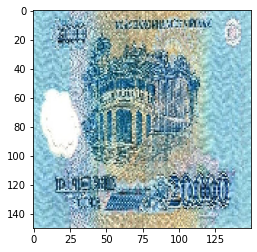

In [30]:
img = image.load_img('/content/drive/MyDrive/AI/11 Loai Tien Giay/Test/20000/20000- 20.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=1)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
tien[y_classes[0]]
#tien = ['1000','10000','100000','200','2000','20000','200000','500','5000','50000','500000']
print('Giá trị dự đoán:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print("1000")
if np.argmax(model.predict(img)) == 1:
   print("10000")
if np.argmax(model.predict(img)) == 2:
   print("100000")
if np.argmax(model.predict(img)) == 3:
   print("200")
if np.argmax(model.predict(img)) == 4:
   print("2000")
if np.argmax(model.predict(img)) == 5:
   print("20000")
if np.argmax(model.predict(img)) == 6:
   print("200000")
if np.argmax(model.predict(img)) == 7:
   print("500")
if np.argmax(model.predict(img)) == 8:
   print("5000")
if np.argmax(model.predict(img)) == 9:
   print("50000")
if np.argmax(model.predict(img)) == 10:
   print("500000")

[[4.5417101e-19 6.2604671e-31 5.2357132e-21 2.0873930e-23 1.8271452e-11
  3.1992300e-08 9.4128941e-23 3.9795730e-18 1.0000000e+00 4.2444762e-21
  8.9790257e-18]]
Giá trị dự đoán: 8
5000


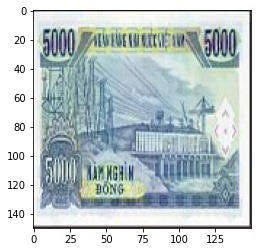

In [27]:
img = image.load_img('/content/drive/MyDrive/AI/11 Loai Tien Giay/Test/5000/5000- 54.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=1)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
tien[y_classes[0]]
#tien = ['1000','10000','100000','200','2000','20000','200000','500','5000','50000','500000']
print('Giá trị dự đoán:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print("1000")
if np.argmax(model.predict(img)) == 1:
   print("10000")
if np.argmax(model.predict(img)) == 2:
   print("100000")
if np.argmax(model.predict(img)) == 3:
   print("200")
if np.argmax(model.predict(img)) == 4:
   print("2000")
if np.argmax(model.predict(img)) == 5:
   print("20000")
if np.argmax(model.predict(img)) == 6:
   print("200000")
if np.argmax(model.predict(img)) == 7:
   print("500")
if np.argmax(model.predict(img)) == 8:
   print("5000")
if np.argmax(model.predict(img)) == 9:
   print("50000")
if np.argmax(model.predict(img)) == 10:
   print("500000")